# Rain Prediction Using Classification

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Loading DataSet

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\testset.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


* All the features that are present in the dataset are listed below

In [4]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

* Removing space from start and end

In [5]:
df.columns = map(lambda x:x.strip() , df.columns)

In [6]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

* Count of different weather conditions from past twenty years in hyderabad is listed below

In [7]:
df._conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

* Most common weather conditions in Hyderabad

[]

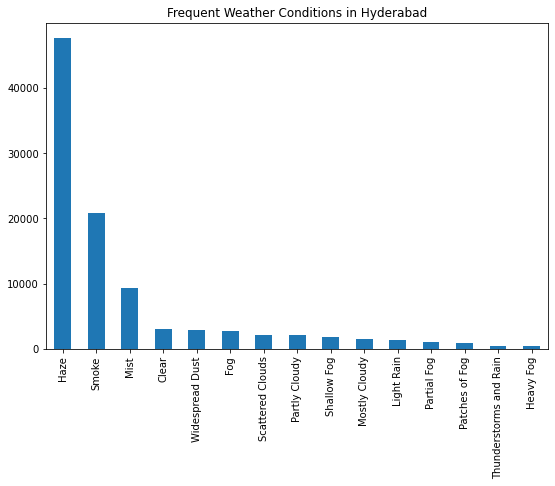

In [8]:
plt.figure(figsize=(9,6))
df._conds.value_counts().head(15).plot(kind='bar')
plt.title("Frequent Weather Conditions in Hyderabad")
plt.plot()

* Least common weather conditions in Hyderabad

[]

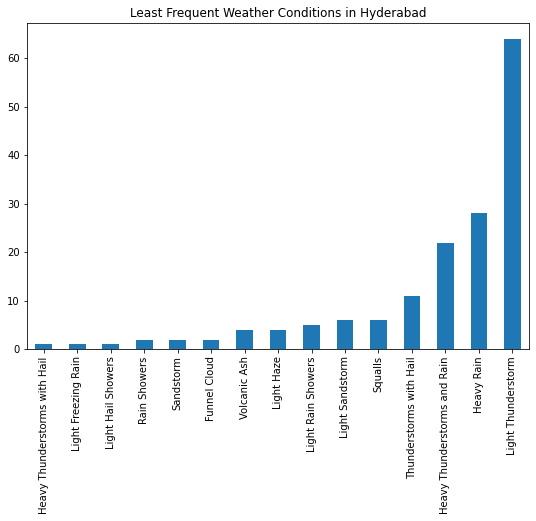

In [9]:
plt.figure(figsize=(9,6))
df._conds.value_counts(ascending=True).head(15).plot(kind='bar')
plt.title("Least Frequent Weather Conditions in Hyderabad")
plt.plot()

* Wind Direction in Hyderabad

In [10]:
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

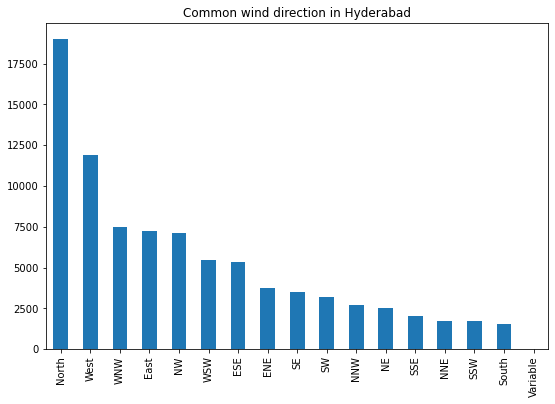

In [11]:
plt.figure(figsize=(9, 6));
plt.title("Common wind direction in Hyderabad");
df._wdire.value_counts().plot(kind="bar");
plt.plot();

* Average Temperature in Hyderabad

In [12]:
print("Average Temperature : ",round(df._tempm.mean(axis=0),2))

Average Temperature :  25.45


* Extracting Month and Year for all given data points

In [13]:
def extract_year(value):
    return (value[0:4])

def extract_month(value):
    return (value[4:6])

In [14]:
df["year"]=df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"]=df["datetime_utc"].apply(lambda x:extract_month(x))

In [15]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


* Year range in the dataset

In [16]:
print("Year range:",df.year.min(),",",df.year.max())

Year range: 1996 , 2017


* Count of number of instances of each year

In [17]:
df.year.value_counts(ascending=False)

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [18]:
df1=df.groupby(["year","_rain"]).size()

* Number of instances when it rained and not rained is stored in df1

In [19]:
df1.head()

year  _rain
1996  0        1278
1997  0        6312
      1         201
1998  0        3438
      1         141
dtype: int64

* Plot for each year vs no of instaces rained and no of instances not rained

<AxesSubplot:xlabel='year,_rain'>

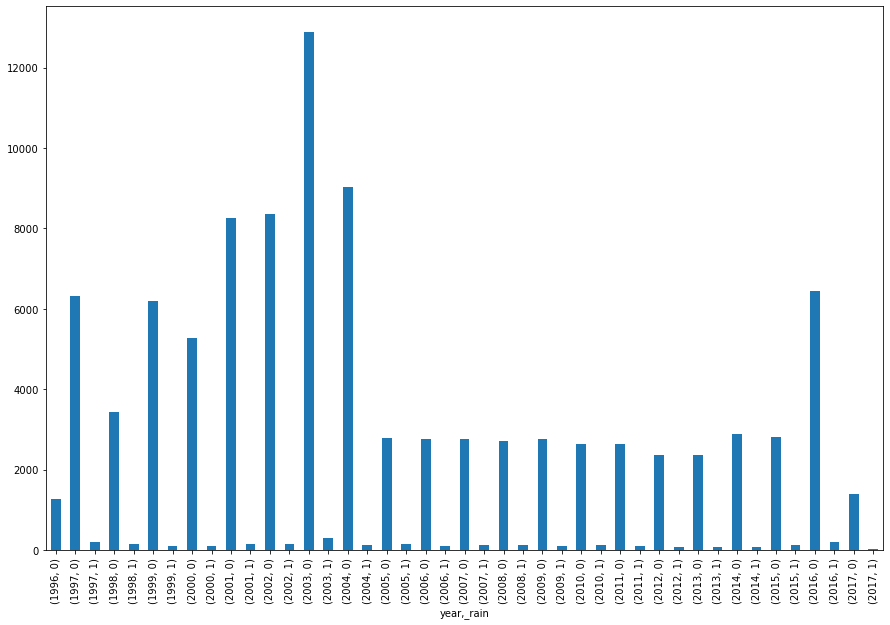

In [20]:
df1.plot(figsize=(15,10),kind='bar',x='year',y='no of sessions')

* Temperature Mean for each year

In [21]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

* Humidity Mean for each year

In [22]:
df.groupby("year")._hum.mean()

year
1996    53.676728
1997    68.217885
1998    69.775042
1999    49.845674
2000    62.598992
2001    54.657628
2002    52.079976
2003    59.974653
2004    52.832196
2005    52.812457
2006    54.929023
2007    57.298911
2008    60.117771
2009    54.040436
2010    59.395281
2011    60.886488
2012    54.283600
2013    63.021937
2014    59.999662
2015    61.663587
2016    59.180387
2017    62.172657
Name: _hum, dtype: float64

* Pressure Mean for each year

In [23]:
df.groupby("year")._pressurem.mean()

year
1996      653.453052
1997      731.160755
1998      804.928360
1999    16987.102000
2000      934.518086
2001      842.766869
2002      886.813478
2003      921.269202
2004      940.680545
2005     1007.464852
2006     1007.526353
2007     1007.413854
2008     1007.363444
2009     1007.449383
2010     1007.336731
2011     1007.000000
2012     1006.990935
2013     1007.840730
2014     1008.179885
2015     1008.798833
2016     1015.386882
2017      998.253521
Name: _pressurem, dtype: float64

## Handling Missing Data

* Count of null values in each column/feature

In [24]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
dtype: int64

In [25]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month'],
      dtype='object')

In [26]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail','_hum', '_pressurem', '_rain', '_snow', '_tempm','_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wspdm', 'year', "month"]]

* Checking for null values in dew feature

In [27]:
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,20160907-08:30,Haze,NaN,0,0,NaN,1005.0,0,0,NaN,0,0,4.5,320.0,NW,9.3,2016,09
97259,20160924-12:30,Haze,NaN,0,0,NaN,1002.0,0,0,NaN,0,0,3.0,0.0,North,0.0,2016,09
98049,20161025-07:30,Widespread Dust,NaN,0,0,NaN,1009.0,0,0,NaN,0,0,3.5,280.0,West,14.8,2016,10
99347,20161221-05:30,Haze,NaN,0,0,NaN,1018.0,0,0,NaN,0,0,3.0,270.0,West,11.1,2016,12


* Replacing each null value of dewptm with the mean value of dewptm for that year

In [28]:
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean=df_filtered[df_filtered["year"]==row["year"]]._dewptm.mean()
    df_filtered.at[index,"_dewptm"]=mean

* Now there are no null values for dewptm

In [29]:
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [30]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

* Checking for null values in humidity

In [31]:
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,20161117-07:30,Unknown,10.000000,0,0,NaN,1017.0,0,0,NaN,0,0,NaN,0.0,North,NaN,2016,11
99268,20161217-09:00,Smoke,11.000000,0,0,NaN,1016.0,0,0,NaN,0,0,1.00,20.0,NNE,25.9,2016,12
99347,20161221-05:30,Haze,18.274320,0,0,NaN,1018.0,0,0,NaN,0,0,3.00,270.0,West,11.1,2016,12
99567,20161231-15:00,NaN,13.000000,0,0,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,59.3,2016,12


* Replacing each null value of hum with the mean value of hum for that year

In [32]:
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val

In [33]:
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [34]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

* Checking for null values in pressure feature/column

In [35]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96567,20160821-00:00,Mist,25.0,0,0,81.0,NaN,0,0,28.0,0,0,2.0,110.0,ESE,9.3,2016,08
96907,20160902-18:00,Mist,25.0,0,0,79.0,NaN,0,0,28.0,0,0,2.0,270.0,West,7.4,2016,09
98402,20161108-06:00,Smoke,14.0,0,0,39.0,NaN,0,0,25.0,0,0,1.0,270.0,West,22.2,2016,11
98820,20161126-09:00,Haze,8.0,0,0,15.0,NaN,0,0,30.0,0,0,4.0,290.0,WNW,14.8,2016,11


In [36]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [37]:
df_filtered._pressurem.replace(-9999.0,np.nan,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [38]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [39]:
df_filtered._pressurem.isnull().sum()

983

* Replacing each null value of pressure with the mean value of pressure for that year

In [40]:
for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val

In [41]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

* Replacing each null value of temp with the mean value of temp for that year

In [42]:
for i,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[i, "_tempm"] = mean

* Replacing each null value of vis with the mean value of vis for that year

In [43]:
for i,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[i, "_vism"] = mean

* Replacing each null value of wind with the mean value of wind for that year

In [44]:
for i,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[i, "_wdird"] = mean

* Replacing each null value of windspeed with the mean value of windspeed for that year

In [45]:
for i,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[i, "_wspdm"] = mean

* Replacing each null value of wind direction with the most frequent values of wind direction for that year

In [46]:
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

* Replacing each null value of weather condition with the most frequent values of weather condition for that year

In [47]:
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [48]:
df_filtered.isnull().sum()

datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [49]:
df_filtered.dtypes

datetime_utc     object
_conds           object
_dewptm         float64
_fog              int64
_hail             int64
_hum            float64
_pressurem      float64
_rain             int64
_snow             int64
_tempm          float64
_thunder          int64
_tornado          int64
_vism           float64
_wdird          float64
_wdire           object
_wspdm          float64
year             object
month            object
dtype: object

In [50]:
pd.crosstab( index=df_filtered['year'], columns=df_filtered['month'])

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
1996,0,0,0,0,0,0,0,0,0,0,611,667
1997,654,559,546,608,563,521,656,592,614,640,278,282
1998,265,259,288,292,262,253,363,373,366,298,318,242
1999,253,291,296,178,623,671,703,699,664,585,681,656
2000,691,469,0,1,1,451,717,263,666,719,691,722
2001,721,634,688,696,720,691,716,720,696,684,711,726
2002,730,658,733,693,725,707,732,681,665,733,709,737
2003,685,641,737,709,987,1305,1349,1372,1330,1392,1321,1358
2004,1345,1235,1353,1349,1401,908,245,284,308,244,234,245


* Year wise number of instances when it rained and not rained

In [51]:
df2=df_filtered.groupby(["year","_rain"]).size()
print(df2)

year  _rain
1996  0         1278
1997  0         6312
      1          201
1998  0         3438
      1          141
1999  0         6198
      1          102
2000  0         5283
      1          108
2001  0         8257
      1          146
2002  0         8359
      1          144
2003  0        12876
      1          310
2004  0         9025
      1          126
2005  0         2782
      1          138
2006  0         2758
      1          100
2007  0         2749
      1          116
2008  0         2720
      1          137
2009  0         2761
      1           90
2010  0         2631
      1          137
2011  0         2646
      1           92
2012  0         2362
      1           76
2013  0         2352
      1           76
2014  0         2894
      1           79
2015  0         2822
      1          114
2016  0         6446
      1          188
2017  0         1389
      1           31
dtype: int64


<AxesSubplot:xlabel='year,_rain'>

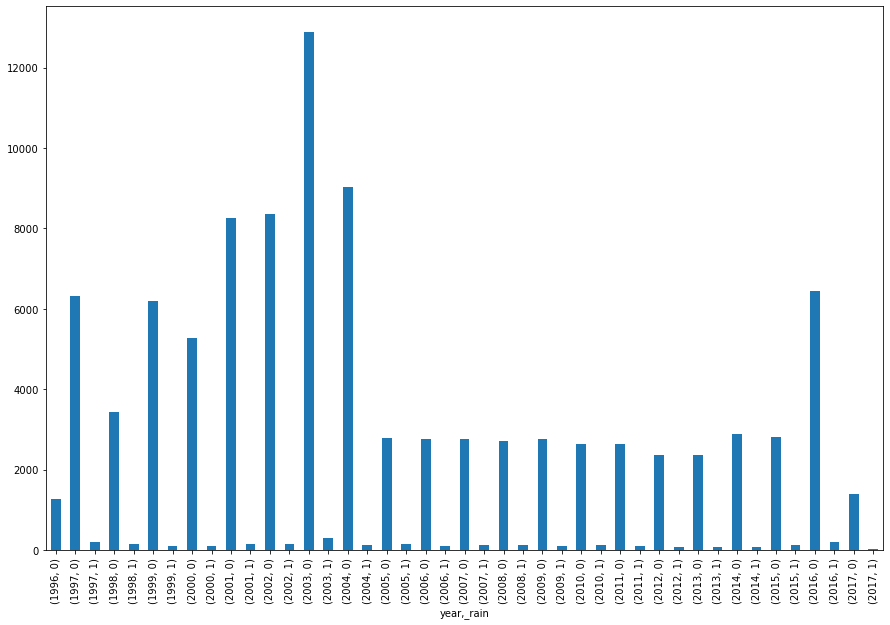

In [52]:
df2.plot(figsize=(15,10),kind='bar')

* Correlation of features

In [53]:
print(df_filtered.corr())

             _dewptm      _fog     _hail      _hum  _pressurem     _rain  \
_dewptm     1.000000 -0.216937  0.003522  0.314338   -0.003929  0.143558   
_fog       -0.216937  1.000000 -0.003106  0.376793   -0.000847 -0.044947   
_hail       0.003522 -0.003106  1.000000  0.007511   -0.000036 -0.001863   
_hum        0.314338  0.376793  0.007511  1.000000   -0.005690  0.171121   
_pressurem -0.003929 -0.000847 -0.000036 -0.005690    1.000000 -0.000524   
_rain       0.143558 -0.044947 -0.001863  0.171121   -0.000524  1.000000   
_snow       0.004141 -0.000861 -0.000036  0.004389   -0.000010 -0.000517   
_tempm      0.527247 -0.448772 -0.002876 -0.589473    0.004652 -0.007385   
_thunder    0.067592 -0.026700  0.107280  0.073133   -0.000311  0.422295   
_tornado   -0.000151 -0.001218 -0.000050 -0.000921   -0.000014 -0.000731   
_vism       0.009905 -0.020482 -0.000483 -0.024134    0.000168 -0.004125   
_wdird     -0.139212 -0.073696  0.004977 -0.276057    0.004199 -0.021377   
_wspdm     -

* Correlation Matrix

<AxesSubplot:>

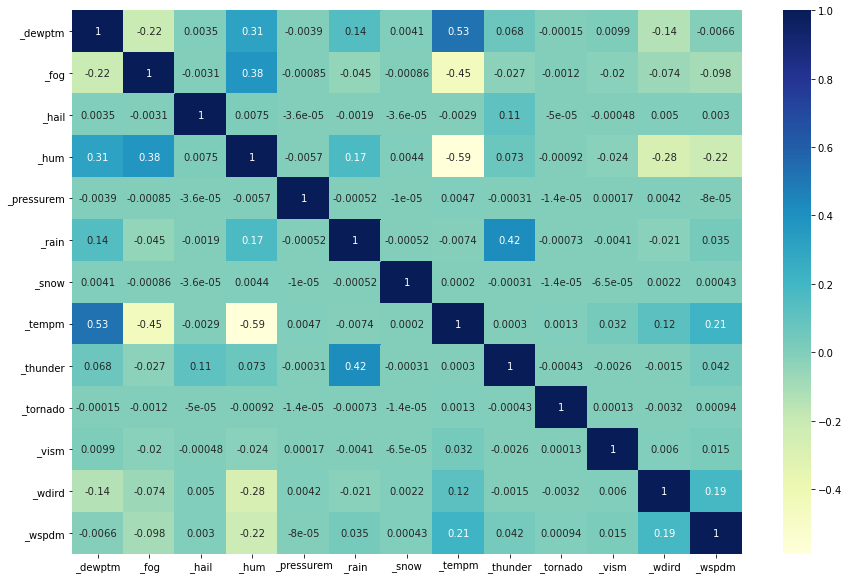

In [54]:
plt.figure(figsize=(15,10))
sb.heatmap(df_filtered.corr(), cmap="YlGnBu", annot=True)

## Encoding and Target DataFrames

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [56]:
df_filtered.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month'],
      dtype='object')

In [57]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']

In [58]:
df_final=df_filtered[feature_columns]

In [59]:
df_final.head()

,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [60]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year           object
month          object
_conds         object
dtype: object

In [61]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [62]:
wdire_dummies=pd.get_dummies(df_final["_wdire"])
print(wdire_dummies)

        ENE  ESE  East  NE  NNE  NNW  NW  North  SE  SSE  SSW  SW  South  \
0         0    0     0   0    0    0   0      0   0    0    0   0      0   
1         0    0     0   0    0    0   0      1   0    0    0   0      0   
2         0    0     0   0    0    0   0      1   0    0    0   0      0   
3         0    0     0   0    0    0   0      1   0    0    0   0      0   
4         0    0     0   0    0    0   0      1   0    0    0   0      0   
...     ...  ...   ...  ..  ...  ...  ..    ...  ..  ...  ...  ..    ...   
100985    0    0     0   0    0    0   1      0   0    0    0   0      0   
100986    0    0     0   0    0    0   1      0   0    0    0   0      0   
100987    0    0     0   0    0    0   0      0   0    0    0   0      0   
100988    0    0     0   0    0    0   1      0   0    0    0   0      0   
100989    0    0     0   0    0    0   1      0   0    0    0   0      0   

        Variable  WNW  WSW  West  
0              0    0    0     1  
1              0 

In [63]:
df_final=pd.concat([wdire_dummies,df_final],axis=1)

In [64]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,0,0,0,0,0,0,0,0,0,0,...,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,0,0,0,0,0,0,0,1,0,0,...,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,0,0,0,0,0,0,0,1,0,0,...,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [65]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', '_conds'],
      dtype='object')

In [66]:
df_final.drop("_wdire",inplace=True,axis=1)

In [67]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

<AxesSubplot:>

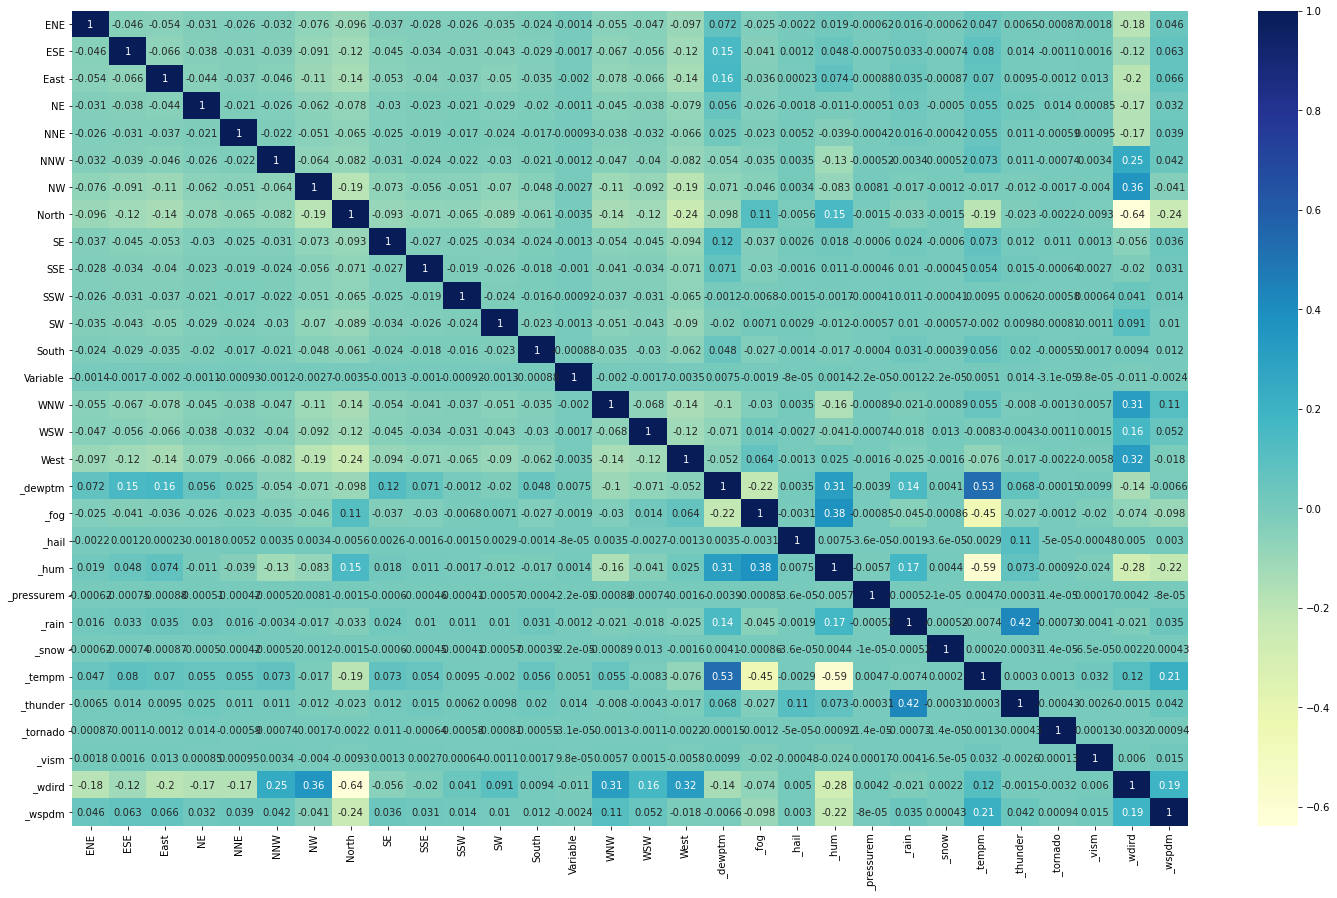

In [68]:
plt.figure(figsize=(25,15))
sb.heatmap(df_final.corr(), cmap="YlGnBu", annot=True)

In [69]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [70]:
selected_columns=df_final[["_dewptm","_hum","_thunder","_wspdm","_tempm","_pressurem","_snow"]]

In [71]:
out_put=df_final[["_rain"]]

In [72]:
selected_columns

,_dewptm,_hum,_thunder,_wspdm,_tempm,_pressurem,_snow
0,9.0,27.0,0,7.400000,30.0,1010.000000,0
1,10.0,32.0,0,5.052735,28.0,1015.429612,0
2,11.0,44.0,0,5.052735,24.0,1015.429612,0
3,10.0,41.0,0,5.052735,24.0,1010.000000,0
4,11.0,47.0,0,0.000000,23.0,1011.000000,0
...,...,...,...,...,...,...,...
100985,17.0,25.0,0,11.100000,34.0,1005.000000,0
100986,14.0,16.0,0,22.200000,38.0,1003.000000,0
100987,12.0,14.0,0,18.500000,36.0,1002.000000,0
100988,15.0,27.0,0,3.700000,32.0,1004.000000,0


In [73]:
out_put

,_rain
0,0
1,0
2,0
3,0
4,0
...,...
100985,0
100986,0
100987,0
100988,0


In [74]:
y_rain=out_put.iloc[:,:].values
y_rain.shape

(100990, 1)

In [75]:
x_test_selected=selected_columns.iloc[:,:].values

In [76]:
x_test_selected.shape

(100990, 7)

In [77]:
df_final.head(10)

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,0,0,0,0,0,0,0,0,0,0,...,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,0,0,0,0,0,0,0,1,0,0,...,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,0,0,0,0,0,0,0,1,0,0,...,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke
5,0,0,0,0,0,0,0,1,0,0,...,0,21.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
6,0,0,0,0,0,0,0,1,0,0,...,0,21.0,0,0,0.800000,0.0,0.000000,1996,11,Smoke
7,0,0,0,0,0,0,0,1,0,0,...,0,21.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
8,0,0,0,0,0,0,0,1,0,0,...,0,19.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
9,0,0,0,0,0,0,0,1,0,0,...,0,19.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke


In [78]:
X=df_final.iloc[:,0:-1].values
X.shape

(100990, 32)

In [79]:
print(X)

[[0 0 0 ... 7.4 '1996' '11']
 [0 0 0 ... 5.0527354260089785 '1996' '11']
 [0 0 0 ... 5.0527354260089785 '1996' '11']
 ...
 [0 0 0 ... 18.5 '2017' '04']
 [0 0 0 ... 3.7 '2017' '04']
 [0 0 0 ... 3.7 '2017' '04']]


In [80]:
Y=df_final.iloc[:,-1].values
Y.shape

(100990,)

In [81]:
print(Y)

['Smoke' 'Smoke' 'Smoke' ... 'Haze' 'Haze' 'Haze']


In [82]:
label_encoder= LabelEncoder()

In [83]:
y=label_encoder.fit_transform(Y)

In [84]:
list(label_encoder.classes_)

['Blowing Sand',
 'Clear',
 'Drizzle',
 'Fog',
 'Funnel Cloud',
 'Haze',
 'Heavy Fog',
 'Heavy Rain',
 'Heavy Thunderstorms and Rain',
 'Heavy Thunderstorms with Hail',
 'Light Drizzle',
 'Light Fog',
 'Light Freezing Rain',
 'Light Hail Showers',
 'Light Haze',
 'Light Rain',
 'Light Rain Showers',
 'Light Sandstorm',
 'Light Thunderstorm',
 'Light Thunderstorms and Rain',
 'Mist',
 'Mostly Cloudy',
 'Overcast',
 'Partial Fog',
 'Partly Cloudy',
 'Patches of Fog',
 'Rain',
 'Rain Showers',
 'Sandstorm',
 'Scattered Clouds',
 'Shallow Fog',
 'Smoke',
 'Squalls',
 'Thunderstorm',
 'Thunderstorms and Rain',
 'Thunderstorms with Hail',
 'Unknown',
 'Volcanic Ash',
 'Widespread Dust']

In [85]:
y.shape

(100990,)

In [86]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [87]:
print(y)

[31 31 31 ...  5  5  5]


## Train and Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [90]:
print("Shape of X_train", x_train.shape)
print("Shape of X_test", x_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 32)
Shape of X_test (25248, 32)
Shape of y_train (75742,)
Shape of y_test (25248,)


In [91]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_test_selected,y_rain,test_size=.25,random_state=0)

In [92]:
print("Shape of X_train", x_train1.shape)
print("Shape of X_test", x_test1.shape)
print("Shape of y_train", y_train1.shape)
print("Shape of y_test", y_test1.shape)

Shape of X_train (75742, 7)
Shape of X_test (25248, 7)
Shape of y_train (75742, 1)
Shape of y_test (25248, 1)


# Model Creation and Training

## Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
clf=  DecisionTreeClassifier(criterion="entropy",random_state=0)

In [95]:
model1 = clf.fit(x_train,y_train)

In [96]:
y_pred=clf.predict(x_test)
y_pred

array([ 5,  5, 31, ..., 15, 24, 20])

In [97]:
list(label_encoder.inverse_transform(y_pred))

['Haze',
 'Haze',
 'Smoke',
 'Partly Cloudy',
 'Smoke',
 'Haze',
 'Mist',
 'Mist',
 'Mostly Cloudy',
 'Haze',
 'Partial Fog',
 'Haze',
 'Clear',
 'Clear',
 'Haze',
 'Smoke',
 'Haze',
 'Smoke',
 'Haze',
 'Mostly Cloudy',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Haze',
 'Smoke',
 'Shallow Fog',
 'Fog',
 'Haze',
 'Haze',
 'Haze',
 'Light Rain',
 'Mist',
 'Fog',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Widespread Dust',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Scattered Clouds',
 'Light Rain',
 'Haze',
 'Smoke',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Partly Cloudy',
 'Haze',
 'Haze',
 'Haze',
 'Mostly Cloudy',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Blowing Sand',
 'Smoke',
 'Haze',
 'Clear',
 'Smoke',
 'Haze',
 'Smoke',
 'Partly Cloudy',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Mist',
 'Smoke',
 'Haze',
 'Haze',
 'Mist',
 'Haze',
 'Fog',
 'Smoke',
 'Shallow Fog',
 'Haze',
 'Shallow Fog',

In [98]:
list(label_encoder.inverse_transform(y_test))

['Haze',
 'Haze',
 'Smoke',
 'Clear',
 'Smoke',
 'Haze',
 'Mist',
 'Mist',
 'Mostly Cloudy',
 'Haze',
 'Patches of Fog',
 'Haze',
 'Clear',
 'Haze',
 'Light Drizzle',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Haze',
 'Smoke',
 'Shallow Fog',
 'Shallow Fog',
 'Haze',
 'Haze',
 'Haze',
 'Light Rain',
 'Mist',
 'Fog',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Smoke',
 'Haze',
 'Partly Cloudy',
 'Light Drizzle',
 'Haze',
 'Smoke',
 'Mist',
 'Haze',
 'Haze',
 'Haze',
 'Haze',
 'Scattered Clouds',
 'Haze',
 'Haze',
 'Haze',
 'Mostly Cloudy',
 'Clear',
 'Haze',
 'Smoke',
 'Widespread Dust',
 'Blowing Sand',
 'Smoke',
 'Haze',
 'Clear',
 'Haze',
 'Mist',
 'Smoke',
 'Smoke',
 'Smoke',
 'Smoke',
 'Haze',
 'Mist',
 'Haze',
 'Haze',
 'Smoke',
 'Haze',
 'Mist',
 'Smoke',
 'Haze',
 'Haze',
 'Mist',
 'Haze',
 'Fog',
 'Smoke',
 'Shallow Fog',
 'Haze',
 'Fog',
 'Smoke',
 

### Accuracy 

In [99]:
from sklearn import metrics

In [100]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7853691381495564


## Decision Tree Classifier

In [101]:
clf2=  DecisionTreeClassifier(criterion="entropy",random_state=0)
model1 = clf2.fit(x_train1,y_train1)

In [102]:
y_pred1=clf2.predict(x_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy 

In [103]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test1, y_pred1))

DecisionTrees's Accuracy:  0.9703738910012675


## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression()

In [106]:
lr.fit(x_train1,y_train1)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred2=lr.predict(x_test1)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy 

In [108]:
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test1, y_pred2))

LogisticRegression's Accuracy:  0.9781368821292775


## kNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)

In [111]:
knn.fit(x_train1,y_train1)

<ipython-input-111-fde80a982716>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train1,y_train1)


KNeighborsClassifier(n_neighbors=3)

In [112]:
y_pred_knn=knn.predict(x_test1)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy 

In [113]:
print("kNN's Accuracy: ", metrics.accuracy_score(y_test1, y_pred_knn))

kNN's Accuracy:  0.9743346007604563


## RandomForest 

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier()

In [116]:
rf.fit(x_train1,y_train1)

<ipython-input-116-66e57db8674c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train1,y_train1)


RandomForestClassifier()

In [117]:
y_pred_random = rf.predict(x_test1)
y_pred_random

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy 

In [118]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test1, y_pred_random))

Random Forest's Accuracy:  0.9775823827629911
